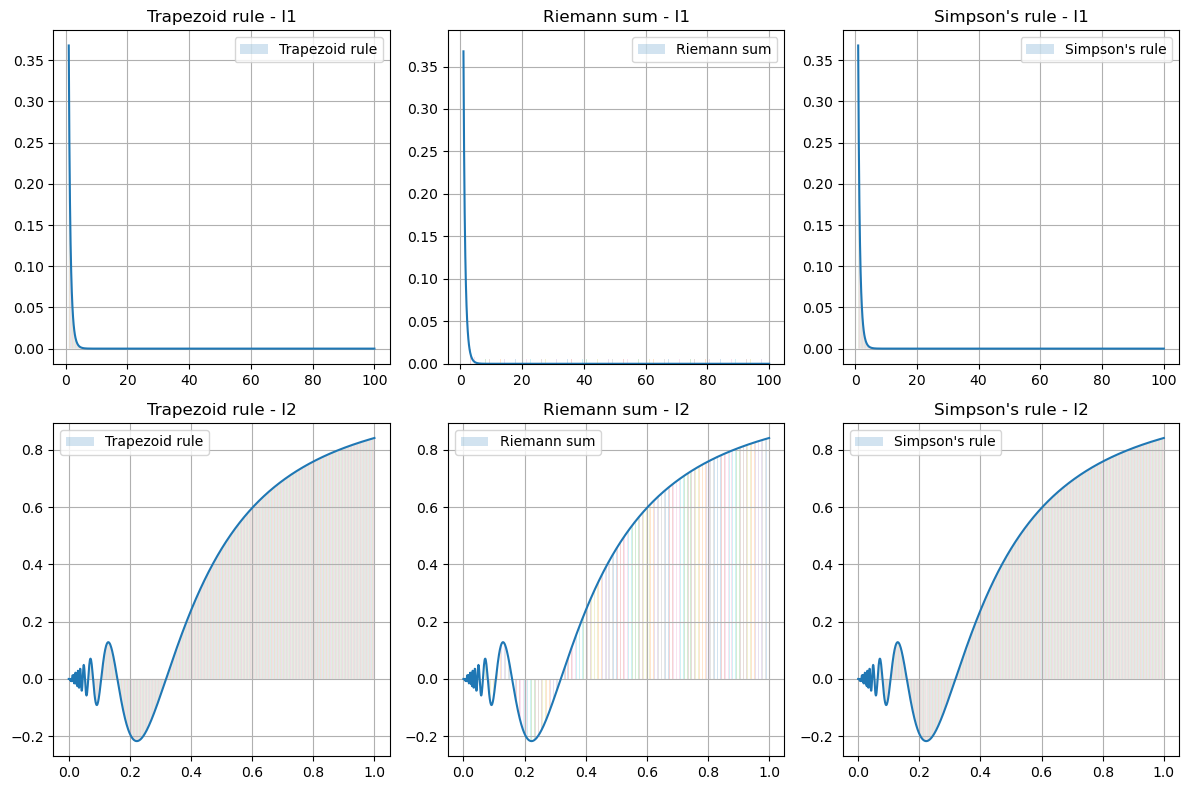

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the integrands for I1 and I2
def integrand_I1(x):
    return np.exp(-x) / x

def integrand_I2(x):
    # return x * np.sin(1 / x)   This line would return a division by zero error
    # To mitigate this, we can use a boolean mask
    result = np.zeros_like(x)
    mask = x != 0
    result[mask] = x[mask] * np.sin(1 / x[mask])
    return result

# Initialize the parameters for the integrals
a1, b1 = 1, 100
a2, b2 = 0, 1
h_initial_1 = b1 - a1
h_initial_2 = b2 - a2

# Define the trapezoid rule for numerical integration
def trapezoid_rule(f, a, b, h):
    n = int((b - a) / h)            # Calculate the number of intervals
    x = np.linspace(a, b, n + 1)    # Create an array of equally spaced points between a and b
    y = f(x)                        # Evaluate the integrand at the x values
    # Calculate the trapezoid rule sum, including the contributions from the first and last points
    return h * (0.5 * y[0] + 0.5 * y[-1] + np.sum(y[1:-1]))

# Define the Riemann sum for numerical integration
def riemann_sum(f, a, b, h):
    n = int((b - a) / h)            # Calculate the number of intervals
    x = np.linspace(a, b, n + 1)    # Create an array of equally spaced points between a and b
    # Evaluate the integrand at the midpoints of each interval (x[:-1] + h / 2)
    y = f(x[:-1] + h / 2)
    # Calculate the Riemann sum by summing the function values and multiplying by the interval width h
    return h * np.sum(y)

# Define Simpson's rule for numerical integration
def simpsons_rule(f, a, b, N):
    if N % 2 != 0:
        raise ValueError("N must be even for Simpson's rule.")
    h = (b - a) / N                 # Calculate the interval width
    x = np.linspace(a, b, N + 1)    # Create an array of equally spaced points between a and b
    y = f(x)                        # Evaluate the integrand at the x values
    # Calculate the Simpson's rule sum, including the contributions from the first and last points,
    # the odd-indexed points (multiplied by 4), and the even-indexed points (multiplied by 2)
    return h / 3 * (y[0] + y[-1] + 2 * np.sum(y[2:-1:2]) + 4 * np.sum(y[1:-1:2]))

# Function to calculate the integral using different methods and halving the interval width
# Note that Simpson's rule has to be treated differently
def calculate_integral(integrand, a, b, initial_h, integration_method, target_relative_change=1e-4):
    h = initial_h if integration_method is not simpsons_rule else 2
    previous_result = integration_method(integrand, a, b, h)
    while True:
        h = h/2 if integration_method is not simpsons_rule else h*2
        current_result = integration_method(integrand, a, b, h)
        relative_change = np.abs((current_result - previous_result) / previous_result)
        if relative_change < target_relative_change:
            break
        previous_result = current_result
    return (current_result, h)

def plot_fill(ax, x, y, h, method, label):
    if method is trapezoid_rule:
        x_trapezoid = np.linspace(x[0], x[-1], len(x))
        y_trapezoid = y
        for i in range(len(x) - 1):
            ax.fill_between(x_trapezoid[i:i+2], 0, y_trapezoid[i:i+2], alpha=0.2, label=label if i == 0 else None)
    elif method is riemann_sum:
        x_riemann = np.linspace(x[0], x[-1], len(x))
        y_riemann = y[:-1] + h / 2
        for i in range(len(x) - 1):
            ax.bar(x_riemann[i:i+1], y_riemann[i:i+1], width=h, alpha=0.2, align='edge', label=label if i == 0 else None)
    elif method is simpsons_rule:
        num_simpson_intervals = 2 * (len(x) - 1)
        x_simpson = np.linspace(x[0], x[-1], num_simpson_intervals + 1)
        y_simpson = np.interp(x_simpson, x, y)
        for i in range(0, num_simpson_intervals, 2):
            quad_x = x_simpson[i:i+3]
            quad_y = y_simpson[i:i+3]
            coeffs = np.polyfit(quad_x, quad_y, 2)
            quad_approx = np.poly1d(coeffs)
            quad_plot_x = np.linspace(quad_x[0], quad_x[-1], 100)
            ax.fill_between(quad_plot_x, 0, quad_approx(quad_plot_x), alpha=0.2, label=label if i == 0 else None)

# Calculate the integrals I1 and I2 with different methods
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
methods = [("Trapezoid rule", trapezoid_rule), ("Riemann sum", riemann_sum), ("Simpson's rule", simpsons_rule)]

x1 = np.linspace(a1, b1, 1000)
y1 = integrand_I1(x1)
x2 = np.linspace(a2, b2, 1000)
y2 = integrand_I2(x2)

for i, (method_name, method) in enumerate(methods):
    result_I1 = calculate_integral(integrand_I1, a1, b1, h_initial_1, method)
    result_I2 = calculate_integral(integrand_I2, a2, b2, h_initial_2, method)
    
    axs[0, i].plot(x1, y1)
    axs[1, i].plot(x2, y2)
    
    plot_fill(axs[0, i], x1, y1, result_I1[1], method, method_name)
    plot_fill(axs[1, i], x2, y2, result_I2[1], method, method_name)
    
    axs[0, i].set_title(f"{method_name} - I1")
    axs[1, i].set_title(f"{method_name} - I2")
    
    axs[0, i].legend()
    axs[1, i].legend()
    
    axs[0, i].grid()
    axs[1, i].grid()

plt.tight_layout()
plt.show()
fig.savefig('integral_comparison.pdf', dpi=300)

